(freqtrackcpp)=
# Tracking mutations over time using C++

In [1]:
# Make sure we can import fp11recipes
import sys
sys.path.append("../..")

## Running the tracker

This recipe revisits the [Python frequency tracker](freqtrackpy) using a tracker written in C++.
The tracker's code is shown in the next section.
First, let's run it:

In [2]:
import fwdpy11
from fp11recipes.freqtrackercpp import FreqTracker

pdict = {
    "nregions": [],
    "sregions": [fwdpy11.ExpS(beg=0, end=1, weight=1, mean=0.2)],
    "recregions": [fwdpy11.PoissonInterval(0, 1, 1e-2)],
    "gvalue": [fwdpy11.Multiplicative(2.0)],
    "rates": (0.0, 1e-3, None),
    "simlen": 100,
}
params = fwdpy11.ModelParams(**pdict)
pop = fwdpy11.DiploidPopulation(100, 1.0)
rng = fwdpy11.GSLrng(42)
recorder = FreqTracker(0)
fwdpy11.evolvets(
    rng,
    pop,
    params,
    10,
    recorder,
    track_mutation_counts=True,
    suppress_table_indexing=False,
)

We will reuse code from the previous recipe to convert the output to a data frame and plot:

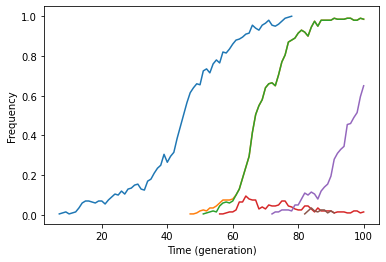

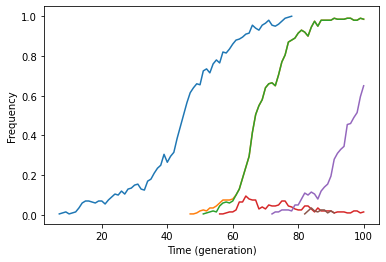

In [3]:
import fp11recipes
from myst_nb import glue

df = fp11recipes.traj2df(recorder.trajectories, pop.N)
f, ax = fp11recipes.plot_traj_df(df, minlen=10)
glue("cppfreqtrackfig", f, display=False)

```{glue:figure} cppfreqtrackfig
:name: 'cppfreqtrackfig'

Some sweeps from new mutations.
This should look identical to {numref}`pyfreqtrackfig`.
```

## The C++ code

The code is relatively straightforward C++.
The main difference from the Python version is that we use `unordered_map` as our associative container.
C++ does not have hashing functions for tuples, meaning that we have to adjust our scheme a bit.
Here, we use nested associative containers.
The outer container hashes the mutations' origin times.
The inner container hashes position.

We manually define a property to convert the data to a `dict`.

```{literalinclude} ../../fp11recipes/freqtrackercpp.cc
:language: cpp
```